https://www.analyticsvidhya.com/blog/2018/09/introduction-graph-theory-applications-python/


data: https://drive.google.com/file/d/1S5c2z89SdzxSVeflWuwVT9EWHXB7Iv8Y/view

Find Shortest path between two airports by distance and air time.

# Load Data

In [2]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
flight_dat=pd.read_csv('Data/Flightdata.csv')

In [4]:
flight_dat.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,AirTime,Origin,Dest,Distance
0,2008,1,3,4,2003.0,1955,2211.0,2225,116.0,IAD,TPA,810
1,2008,1,3,4,754.0,735,1002.0,1000,113.0,IAD,TPA,810
2,2008,1,3,4,628.0,620,804.0,750,76.0,IND,BWI,515
3,2008,1,3,4,926.0,930,1054.0,1100,78.0,IND,BWI,515
4,2008,1,3,4,1829.0,1755,1959.0,1925,77.0,IND,BWI,515


# Create Graph
Airports will be nodes, edges represent connections with time and distance attributes.

In [5]:
G = nx.from_pandas_edgelist(flight_dat, source='Origin', target='Dest', edge_attr=True)

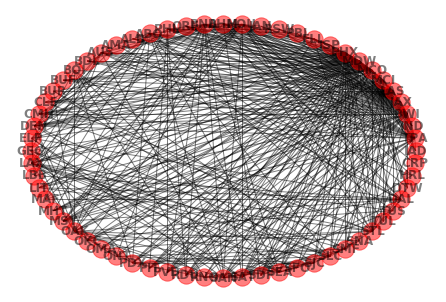

In [8]:
nx.draw_circular(G, with_labels=True, font_weight='bold', alpha=0.5)

In [30]:
list(G.edges.data())[0:2]

[('IAD',
  'TPA',
  {'Year': 2008,
   'Month': 1,
   'DayofMonth': 18,
   'DayOfWeek': 5,
   'DepTime': 1910.0,
   'CRSDepTime': 1915,
   'ArrTime': 2134.0,
   'CRSArrTime': 2145,
   'AirTime': 128.0,
   'Origin': 'IAD',
   'Dest': 'TPA',
   'Distance': 810}),
 ('IAD',
  'LAS',
  {'Year': 2008,
   'Month': 1,
   'DayofMonth': 18,
   'DayOfWeek': 5,
   'DepTime': 1639.0,
   'CRSDepTime': 1635,
   'ArrTime': 2357.0,
   'CRSArrTime': 2355,
   'AirTime': 224.0,
   'Origin': 'LAS',
   'Dest': 'IAD',
   'Distance': 2066})]

In [36]:
G.nodes

NodeView(('IAD', 'TPA', 'IND', 'BWI', 'JAX', 'LAS', 'MCI', 'MCO', 'MDW', 'PHX', 'ISP', 'FLL', 'PBI', 'RSW', 'JAN', 'HOU', 'BHM', 'BNA', 'ORF', 'PHL', 'ABQ', 'ALB', 'AMA', 'AUS', 'BDL', 'BOI', 'BUF', 'BUR', 'CLE', 'CMH', 'DEN', 'ELP', 'GEG', 'LAX', 'LBB', 'LIT', 'MAF', 'MHT', 'MSY', 'OAK', 'OKC', 'OMA', 'ONT', 'PDX', 'PIT', 'PVD', 'RDU', 'RNO', 'SAN', 'SAT', 'SDF', 'SEA', 'SFO', 'SJC', 'SLC', 'SMF', 'SNA', 'STL', 'TUL', 'TUS', 'DAL', 'DTW', 'HRL', 'CRP'))

Dijkstra's shortest path algorithm: https://brilliant.org/wiki/dijkstras-short-path-finder/

In [37]:
shortest_path = nx.dijkstra_path(G, 
                                 source = 'PVD',
                                 target='OAK'
                                 ,weight='Distance')
shortest_path

['PVD', 'MDW', 'OAK']

In [38]:
shortest_path = nx.dijkstra_path(G, 
                                 source = 'PVD',
                                 target='OAK'
                                 ,weight='AirTime')
shortest_path

['PVD', 'LAS', 'OAK']